### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [119]:
pip install matplotlib seaborn pandas numpy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [121]:
data = pd.read_csv('data/coupons.csv')

In [122]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Dustin Gannon Plan - Ok I am going to use these markdown cells to describe my apprach and insights to this solution exersize to allow others to follow my logic and reasoning for this assignment.

First thing I need to do is get a mental understanding of what is in this data and where their might be data that is either problematic or missing or potentially outlier and wrong.

To do this we are going to start with a understanding of the data via the data.info() pandas function which will give us the quick overview of the counts, non-nulls, and data types we have in this file.

In [5]:
print("----- Data Info -----")
data.info()

----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar           

Dustin Gannon Plan - and the second thing I want to do us understand where the data has null values which can complicate my ability to get accurate data and insights.  I am also going to save this data into a python series so i can refer to it later if needed as i continue my research.  And from a quick review it looks like most of the columns have good data until you get to the car, bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 so those might end up being data quality issues I need to figure out as i figureout the corelations inside this data set.  First review of the data is a lot of this data is catagorical and will make understanding the data's correlation difficult.

In [6]:
print("\n----- Missing Values -----")
missing_counts = data.isnull().sum()
print(missing_counts)


----- Missing Values -----
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


Dustin Gannon Plan - the next thing I want to do is use the pandas describe function to help me understand the shapes of the data inside this dataset.  This will help me understand ranges and give me more insights to the quality and size of the data.

In [7]:
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


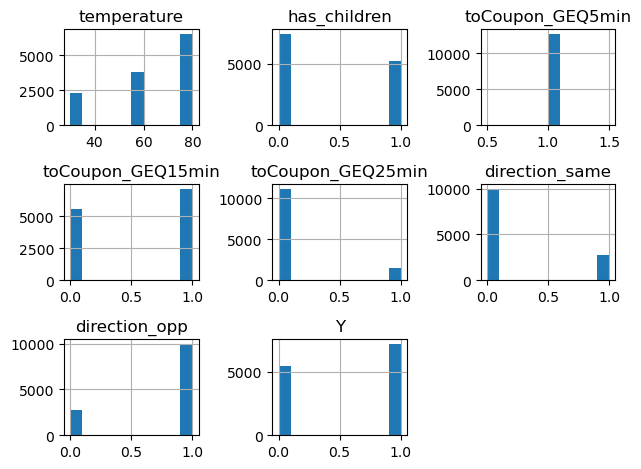

In [8]:
data.hist()
plt.tight_layout() 
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

Dustin Gannon Plan - After reviewing the data i found that 99% of the data for the car item is missing.  I will choose to drop this column as it provides little to no data and could create noise in our alanytics.

I also see there are between 107 to 217 missing values on the catagorical columns.  I am going to choose to update those values with a new value of missing so there are no nulls in the data set, and it clearly will highlight to the end user the gap on our data when they are making their analysis.  This data set is not large and can be safely copied to have a new object with my modifications so we can compare the origional data frame and my new data clensed object.

In [9]:
# Make a copy of the original data so you can always go back to it if needed
data_prepped = data.copy()

# 1. Drop the 'car' column (since it's ~99% missing)
data_prepped.drop('car', axis=1, inplace=True)

# 2. Define which columns are frequency columns with small amounts of missing data
freq_columns = ['Bar', 'CoffeeHouse', 'CarryAway',
                'RestaurantLessThan20', 'Restaurant20To50']

# 3. Fill missing values with 'missing'
for col in freq_columns:
    data_prepped[col] = data_prepped[col].fillna('missing')

# Let's verify the missing values are handled
print("Missing values after transformation:")
print(data_prepped.isnull().sum())

Missing values after transformation:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


Dustin Gannon Plan - I also want to give much better ability to draw out correlation aspects of this data set, so I am going to add new columns into this data frame with numerical fields instead of the catagories so i can see better histogram and scatterplot aspects of this data set.

In [10]:
# Example frequency mapping for those columns that have specific categories.  THis is where we make the numerical assumption of the catagory in the origional data frame.
freq_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10,
    'missing': -1
}

In [11]:
# 1. Identify which columns are still "object" dtype (i.e., categorical in your dataset).
cat_cols = data_prepped.select_dtypes(include='object').columns

In [12]:
# 2. Identify which of these columns follow the "frequency" pattern (i.e., 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50')
freq_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

In [13]:
# 3. Create numeric versions of ALL categorical columns:
for col in cat_cols:
    if col in freq_columns:
        # Use your custom freq_map for frequency columns
        data_prepped[col + "_num"] = data_prepped[col].map(freq_map)
    else:
        # Use pandas factorize() to encode non-frequency categorical columns
        # factorize() returns two objects: [codes, uniques]
        # We only need the integer codes for the new column
        encoded, _ = pd.factorize(data_prepped[col])
        data_prepped[col + "_enc"] = encoded

In [14]:
# Now you have original columns + numeric/encoded columns
print(data_prepped.head(10))  # Check the new columns

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   
5  No Urgent Place  Friend(s)   Sunny           80   6PM   
6  No Urgent Place  Friend(s)   Sunny           55   2PM   
7  No Urgent Place     Kid(s)   Sunny           80  10AM   
8  No Urgent Place     Kid(s)   Sunny           80  10AM   
9  No Urgent Place     Kid(s)   Sunny           80  10AM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Fe

In [15]:
#Saing the cleansed data to a csv to be able to view in excel for spot check and dual review.
#data_prepped.to_csv('data/data_prepped.csv', index=False)

In [16]:
print("This is the new data frame with numerical columns for each category column for better visualizations.")
data_prepped.describe(include='all')

This is the new data frame with numerical columns for each category column for better visualizations.


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,age_enc,maritalStatus_enc,education_enc,occupation_enc,income_enc,Bar_num,CoffeeHouse_num,CarryAway_num,RestaurantLessThan20_num,Restaurant20To50_num
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,2.915169,1.341848,1.356354,7.680227,3.847130,1.440161,2.478083,4.141990,3.709003,1.535478
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,2.137671,0.844149,1.420424,6.320758,2.480907,2.189652,2.997212,3.021321,2.899360,1.822551
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,1.000000,1.000000,7.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,2.000000,2.000000,12.000000,6.000000,2.000000,2.000000,6.000000,6.000000,2.000000


This is the new data frame historgram numerical columns for each category column for better visualizations.


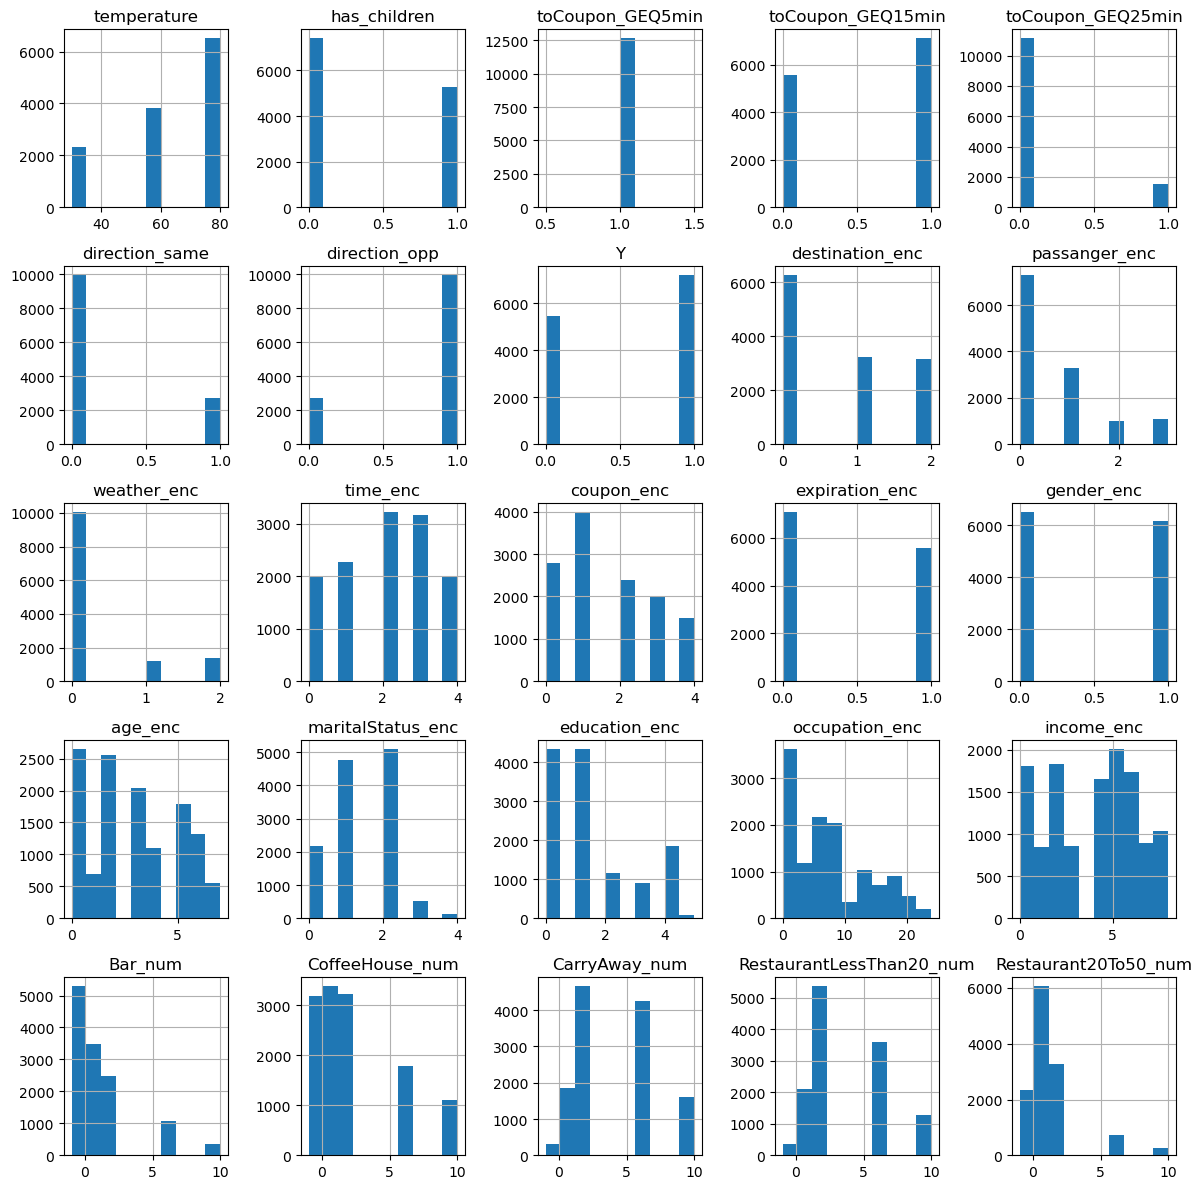

In [17]:
print("This is the new data frame historgram numerical columns for each category column for better visualizations.")
data_prepped.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

In [18]:
print("This is the new data frame with catagories encoded to better understand the data sample numerical columns for each category column for better visualizations.")
data_prepped.sample(20)

This is the new data frame with catagories encoded to better understand the data sample numerical columns for each category column for better visualizations.


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,age_enc,maritalStatus_enc,education_enc,occupation_enc,income_enc,Bar_num,CoffeeHouse_num,CarryAway_num,RestaurantLessThan20_num,Restaurant20To50_num
12186,Home,Alone,Snowy,30,10PM,Carry out & Take away,1d,Male,26,Single,...,2,1,3,0,0,10,10,10,10,10
9536,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,below21,Unmarried partner,...,7,0,0,2,6,1,2,1,2,1
5718,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Married partner,...,2,2,4,0,1,6,2,6,6,2
3512,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,41,Divorced,...,4,3,0,20,5,1,1,6,2,1
3466,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,below21,Single,...,7,1,0,2,6,0,2,6,6,2
10343,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,21,Single,...,0,1,0,11,5,2,6,1,0,0
9295,No Urgent Place,Friend(s),Sunny,55,10AM,Restaurant(<20),2h,Male,below21,Single,...,7,1,3,2,7,0,1,2,6,6
1963,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,36,Married partner,...,6,2,0,7,3,2,2,2,6,1
7112,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,31,Married partner,...,3,2,4,3,1,1,1,6,6,1
3794,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,26,Single,...,2,1,0,21,5,2,2,2,2,1


4. What proportion of the total observations chose to accept the coupon?



In [19]:
accepted_proportion = data['Y'].mean()
print(f"\nProportion of customers who accepted the coupon from origional data frame: {accepted_proportion:.2f}")

accepted_proportion = data_prepped['Y'].mean()
print(f"\nProportion of customers who accepted the coupon on the cleaned and prepped data frame: {accepted_proportion:.2f}")

print("Doing this twice to show the data cleansing and prepping did not loose accuracy or our most compelling field.")


Proportion of customers who accepted the coupon from origional data frame: 0.57

Proportion of customers who accepted the coupon on the cleaned and prepped data frame: 0.57
Doing this twice to show the data cleansing and prepping did not loose accuracy or our most compelling field.


5. Use a bar plot to visualize the `coupon` column.

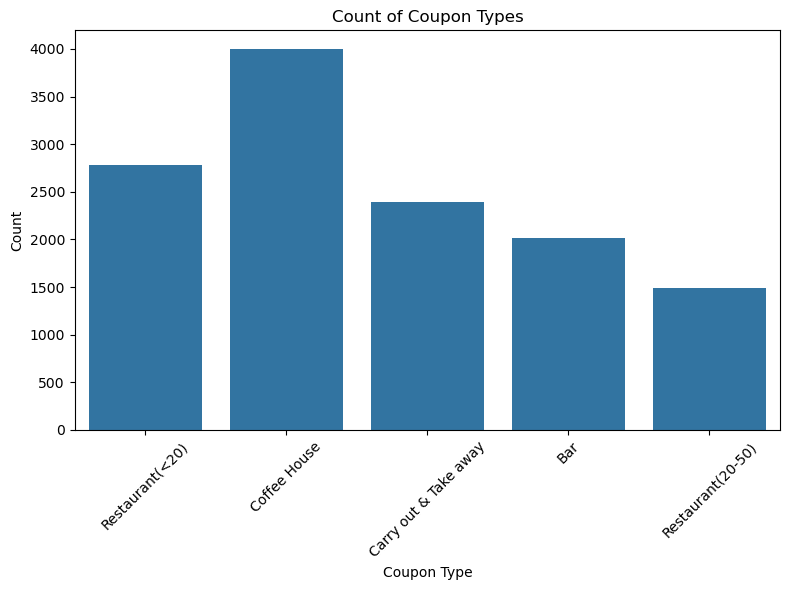

In [20]:
# Bar plot of the coupon column
plt.figure(figsize=(8, 6))
sns.countplot(x='coupon', data=data_prepped)
plt.xticks(rotation=45)
plt.title("Count of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

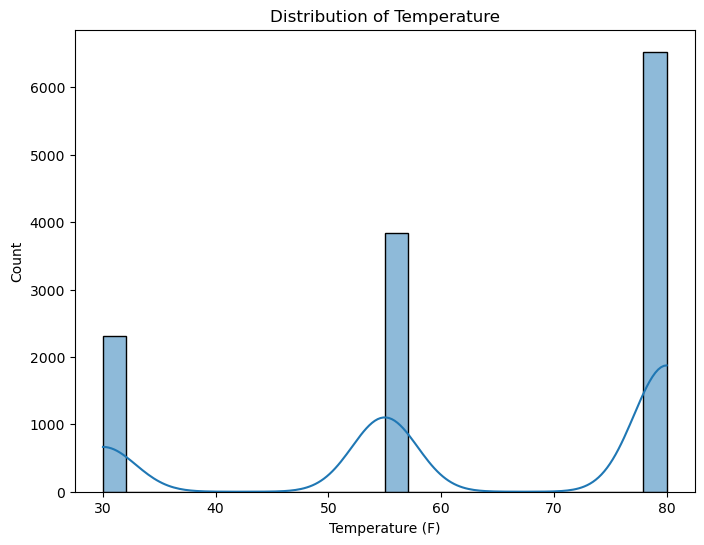

In [21]:
# 6. Histogram of the temperature column
plt.figure(figsize=(8, 6))
sns.histplot(data=data_prepped, x='temperature', kde=True)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
# 1. Create a DataFrame for only Bar coupons
bar_data = data_prepped[data_prepped['coupon'] == 'Bar']

print("Number of bar coupons:", len(bar_data))
bar_data.head()

Number of bar coupons: 2017


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,age_enc,maritalStatus_enc,education_enc,occupation_enc,income_enc,Bar_num,CoffeeHouse_num,CarryAway_num,RestaurantLessThan20_num,Restaurant20To50_num
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,-1,6,2
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,-1,6,2
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,-1,6,2
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,1,1,1,1,0,1,6,6,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,1,1,1,1,0,1,6,6,1


2. What proportion of bar coupons were accepted?


In [23]:
# 2. Proportion of accepted bar coupons
bar_acceptance_rate = bar_data['Y'].mean()
print(f"Proportion of Bar coupons accepted: {bar_acceptance_rate:.2f}")

Proportion of Bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# 3. Divide bar_data into two groups
bar_few = bar_data[bar_data['Bar_num'] <= 2]    # 3 or fewer times
bar_more = bar_data[bar_data['Bar_num'] > 2]    # More than 3 times

accept_few = bar_few['Y'].mean()
accept_more = bar_more['Y'].mean()

print(f"Acceptance rate (3 or fewer times/month): {accept_few:.2f}")
print(f"Acceptance rate (more than 3 times/month): {accept_more:.2f}")

Acceptance rate (3 or fewer times/month): 0.37
Acceptance rate (more than 3 times/month): 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Define "Over 25" categories (Adjust based on your actual 'age' values!)
over_25_categories = ["26", "31", "36", "41", "46", "50plus"]

In [26]:
# 4. Subset: Bar_num > 1 and age in over_25_categories
group_over_25 = bar_data[(bar_data['Bar_num'] > 1) & (bar_data['age'].isin(over_25_categories))]

In [27]:
# Acceptance rate in that group
accept_over_25 = group_over_25['Y'].mean()
print("Accept over 25", accept_over_25)

Accept over 25 0.6952380952380952


In [28]:
# Acceptance rate in "all others" within bar_data
others = bar_data[~((bar_data['Bar_num'] > 1) & (bar_data['age'].isin(over_25_categories)))]
accept_others = others['Y'].mean()

print("accept_others", accept_others)

accept_others 0.33500313087038197


In [29]:
print(f"Acceptance (Bar_num>1 & Age>25): {accept_over_25:.2f}")
print(f"Acceptance (All others in bar_data): {accept_others:.2f}")

Acceptance (Bar_num>1 & Age>25): 0.70
Acceptance (All others in bar_data): 0.34


The likelyhood of someone accepting the coupon between these two is nearly 2x as high.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
# 5. Subset with the specified conditions
subset_5 = bar_data[
    (bar_data['Bar_num'] > 1) & 
    (bar_data['passanger'] != "Kid(s)") &
    (bar_data['occupation'] != "Farming, Fishing, Forestry")
]
accept_5 = subset_5['Y'].mean()
print(f"Acceptance (Bar_num>1, passanger != kid, occupation != farming/fishing/forestry): {accept_5:.2f}")

Acceptance (Bar_num>1, passanger != kid, occupation != farming/fishing/forestry): 0.71


In [31]:
# Compare to everyone else in bar_data
others_5 = bar_data[~(
    (bar_data['Bar_num'] > 1) & 
    (bar_data['passanger'] != "Kid(s)") &
    (bar_data['occupation'] != "Farming, Fishing, Forestry")
)]
accept_others_5 = others_5['Y'].mean()
print(f"Acceptance (All others): {accept_others_5:.2f}")

Acceptance (All others): 0.30


In [32]:
print(f"Acceptance (Bar_num>1, passanger != kid, occupation != farming/fishing/forestry): {accept_5:.2f}")
print(f"Acceptance (All others): {accept_others_5:.2f}")

Acceptance (Bar_num>1, passanger != kid, occupation != farming/fishing/forestry): 0.71
Acceptance (All others): 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [33]:
# Generate the series one boolean values
condition_1 = (
    (bar_data['Bar_num'] > 1) &
    (bar_data['passanger'] != "Kid(s)") &
    (bar_data['maritalStatus'] != "Widowed")
)

In [34]:
# If "under 30" includes categories "21", "26" ...
under_30_categories = ["21", "26"]  # Adjust as needed
condition_2 = (
    (bar_data['Bar_num'] > 1) &
    (bar_data['age'].isin(under_30_categories))
)

In [35]:
# Suppose "income" has categories like "<$12500", "$12500 - $24999", etc.
# We'll define any category that includes "50000" or "50K" as >= 50K.
# So let's say "less than 50k" are these categories:
under_50k_cats = [
    "Less than $12500", 
    "$12500 - $24999", 
    "$25000 - $37499", 
    "$37500 - $49999", 
    # adjust if you have different naming
]

In [36]:
condition_3 = (
    (bar_data['RestaurantLessThan20_num'] >= 6) & 
    (bar_data['income'].isin(under_50k_cats))
)

In [37]:
# Combine them with OR
combined_condition = condition_1 | condition_2 | condition_3

In [38]:
subset_6 = bar_data[combined_condition]
accept_6 = subset_6['Y'].mean()

In [39]:
# Compare to those who do NOT meet any of these conditions
others_6 = bar_data[~combined_condition]
accept_others_6 = others_6['Y'].mean()

In [40]:
print(f"Acceptance (Condition 1 OR 2 OR 3): {accept_6:.2f}")
print(f"Acceptance (Everyone else): {accept_others_6:.2f}")

Acceptance (Condition 1 OR 2 OR 3): 0.59
Acceptance (Everyone else): 0.30


In [41]:
### 7) HYPOTHESIS
print("""
(7) Hypothesis: Based on these acceptance rates, we might hypothesize that
drivers who already frequent bars and have no children in the car are more
likely to accept bar coupons. Age and marital status also appear to play a role.
""")


(7) Hypothesis: Based on these acceptance rates, we might hypothesize that
drivers who already frequent bars and have no children in the car are more
likely to accept bar coupons. Age and marital status also appear to play a role.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I have decided to do 3 different analysis aspects of this data to futher understand it as we will probably be generating corelation aspects to create machile learning modules as subsequenct lessons.  The first example is to see the difference in acceptance between coupon acceptance of people go to coffee houses frequently vs not often using my encoded values.

In [42]:
## Example 1: Coffee House
coffee_data = data_prepped[data_prepped['coupon'] == 'Coffee House']
coffee_accept = coffee_data['Y'].mean()
print("\n(Independent) Coffee House acceptance:", coffee_accept)


(Independent) Coffee House acceptance: 0.49924924924924924


In [43]:
# Compare acceptance among frequent vs. less frequent coffee visitors
coffee_frequent = coffee_data[coffee_data['CoffeeHouse_num'] > 2]
coffee_rare = coffee_data[coffee_data['CoffeeHouse_num'] <= 2]
print("  Frequent coffee goer acceptance:", coffee_frequent['Y'].mean())
print("  Rare coffee goer acceptance:", coffee_rare['Y'].mean())

  Frequent coffee goer acceptance: 0.675
  Rare coffee goer acceptance: 0.44961489088575096


My second test is to see the acceptance rate between people who visit resturaunts at certian income levels.

In [44]:
## Example 2: Restaurant(<20)
cheap_rest_data = data_prepped[data_prepped['coupon'] == 'Restaurant(<20)']
cheap_rest_accept = cheap_rest_data['Y'].mean()
print("\n(Independent) Restaurant(<20) acceptance:", cheap_rest_accept)


(Independent) Restaurant(<20) acceptance: 0.7071069633883704


In [45]:
# Income-based comparison (e.g., under 50k vs. over 50k)
cheap_rest_under_50k = cheap_rest_data[cheap_rest_data['income'].isin(under_50k_cats)]
cheap_rest_over_50k = cheap_rest_data[~cheap_rest_data['income'].isin(under_50k_cats)]
print("  Under $50k acceptance:", cheap_rest_under_50k['Y'].mean())
print("  $50k or more acceptance:", cheap_rest_over_50k['Y'].mean())

  Under $50k acceptance: 0.7109905020352781
  $50k or more acceptance: 0.7027439024390244


My third test is to see the acceptance rate between people who visit resturaunts at certian income levels.

In [46]:
## Example 3: Carry out & Take away
carryout_data = data_prepped[data_prepped['coupon'] == 'Carry out & Take away']
carryout_accept = carryout_data['Y'].mean()
print("\n(Independent) Carry Out acceptance:", carryout_accept)


(Independent) Carry Out acceptance: 0.7354784788967823


In [47]:
# Compare acceptance with passenger type
carryout_alone = carryout_data[carryout_data['passanger'] == 'Alone']
carryout_others = carryout_data[carryout_data['passanger'] != 'Alone']
print("  Alone acceptance:", carryout_alone['Y'].mean())
print("  With passenger(s) acceptance:", carryout_others['Y'].mean())

  Alone acceptance: 0.7274021352313167
  With passenger(s) acceptance: 0.7469635627530364


As highlighted above, I did some data encoding to greatly improve our ability to see this data visually and draw insights from it.  I encoded all catagories values into numerical assumptions so we could map these to scatter plots to better understand the corelation of the various catagories.

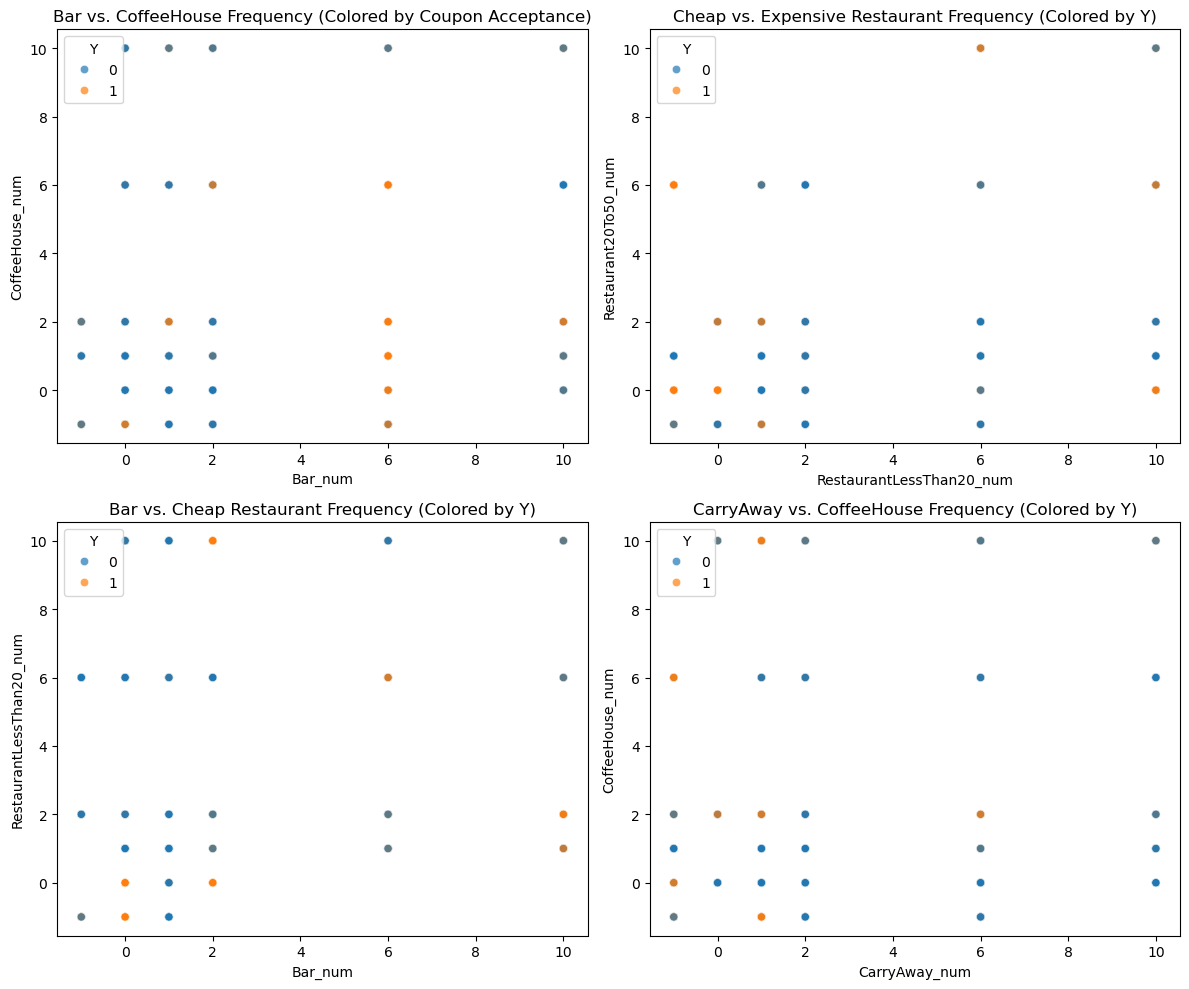

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1) Bar_num vs. CoffeeHouse_num
sns.scatterplot(
    data=data_prepped, 
    x='Bar_num', 
    y='CoffeeHouse_num', 
    hue='Y', 
    alpha=0.7, 
    ax=axes[0,0]
)
axes[0,0].set_title("Bar vs. CoffeeHouse Frequency (Colored by Coupon Acceptance)")

# 2) RestaurantLessThan20_num vs. Restaurant20To50_num
sns.scatterplot(
    data=data_prepped, 
    x='RestaurantLessThan20_num', 
    y='Restaurant20To50_num', 
    hue='Y', 
    alpha=0.7, 
    ax=axes[0,1]
)
axes[0,1].set_title("Cheap vs. Expensive Restaurant Frequency (Colored by Y)")

# 3) Bar_num vs. RestaurantLessThan20_num
sns.scatterplot(
    data=data_prepped,
    x='Bar_num',
    y='RestaurantLessThan20_num',
    hue='Y',
    alpha=0.7,
    ax=axes[1,0]
)
axes[1,0].set_title("Bar vs. Cheap Restaurant Frequency (Colored by Y)")

# 4) CarryAway_num vs. CoffeeHouse_num
sns.scatterplot(
    data=data_prepped,
    x='CarryAway_num',
    y='CoffeeHouse_num',
    hue='Y',
    alpha=0.7,
    ax=axes[1,1]
)
axes[1,1].set_title("CarryAway vs. CoffeeHouse Frequency (Colored by Y)")

plt.tight_layout()
plt.show()

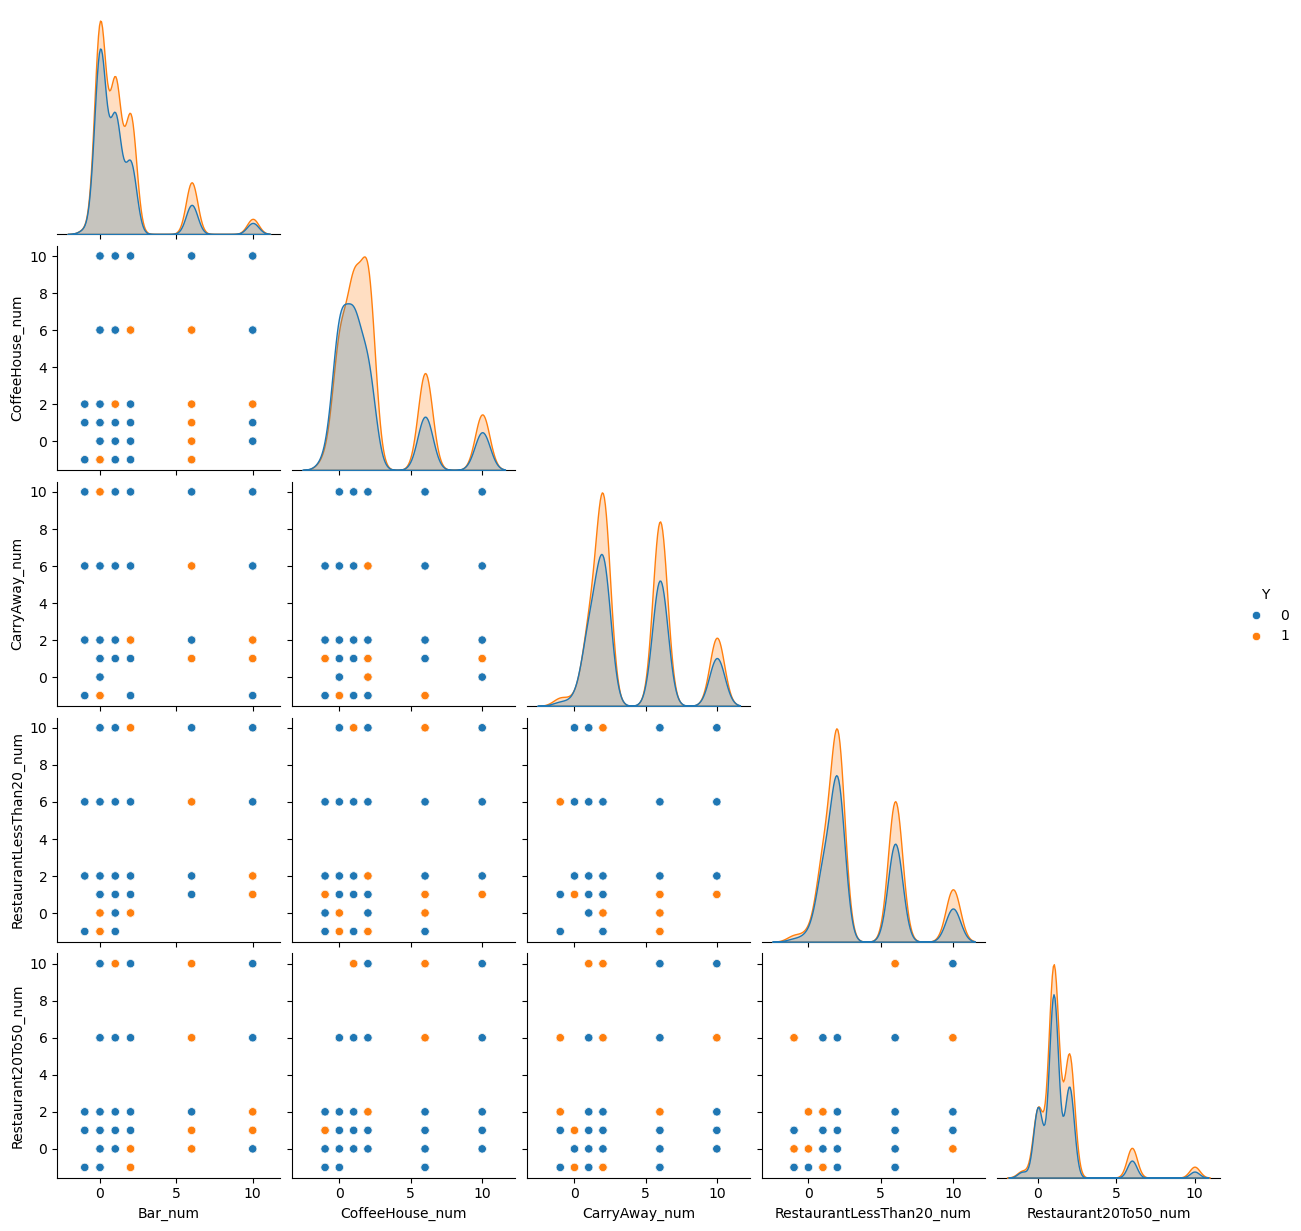

In [49]:
numeric_cols = ['Bar_num', 'CoffeeHouse_num', 'CarryAway_num',
                'RestaurantLessThan20_num', 'Restaurant20To50_num']

sns.pairplot(data_prepped, vars=numeric_cols, hue='Y', corner=True)
plt.show()